# Perspectives in Computational Research: Homework 02

In [7]:
#Libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import tensorflow 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, SimpleRNN
from keras.layers.embeddings import Embedding
from keras.layers import Flatten, Dense
from keras.layers.recurrent import LSTM
from keras.layers import GRU
from keras import losses
from keras import metrics

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


### Load Data

In [8]:
# Train Data
train_data = pd.read_csv('data/congress_train.csv', encoding = "ISO-8859-1", engine='python', error_bad_lines=False)
train_data['Title'].apply(str)
train_title = train_data['Title'].tolist()
train_major = train_data['Major'].tolist()

# Validata Data
val_data = pd.read_csv('data/congress_val.csv', encoding = "ISO-8859-1", engine='python', error_bad_lines=False)
val_data['Title'].apply(str)
val_title = val_data['Title'].tolist()
val_major = val_data['Major'].tolist()

# Test Data
test_data = pd.read_csv('data/congress_test.csv', encoding = "ISO-8859-1", engine='python', error_bad_lines=False)
test_data['Title'].apply(str)
test_title = test_data['Title'].tolist()
test_major = test_data['Major'].tolist()

### Tokenize

In [9]:
token = Tokenizer(num_words=10000) #class restricting to 10000 words

In [10]:
# Train Data
token.fit_on_texts(train_title)
train_sequence = token.texts_to_sequences(train_title)
train_x = pad_sequences(train_sequence, maxlen=100)
train_y = to_categorical(train_major)

In [11]:
# validate Data
token.fit_on_texts(val_title)
val_sequence = token.texts_to_sequences(val_title)
val_x = pad_sequences(val_sequence, maxlen=100)
val_y = to_categorical(val_major)

In [12]:
# validate Data
token.fit_on_texts(test_title)
test_sequence = token.texts_to_sequences(test_title)
test_x = pad_sequences(test_sequence, maxlen=100)
test_y = to_categorical(test_major)

### Embedding
Reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [13]:
#Parameters for Task Specific Embedding
vocab_size = 10000
pad_length = 100
em_space = 32

### Basic Feed Forward Network

In [8]:
# Define the model
basic_model = Sequential()
basic_model.add(Embedding(10000, em_space, input_length = 100))
basic_model.add(Flatten())
basic_model.add(Dense(24, activation='softmax'))

# Compile the model
basic_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#Fit and Store Model Val
basic_metrics = basic_model.fit(train_x, train_y, epochs= 15, batch_size=1024,validation_data = (val_x, val_y))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 8s 28us/step - loss: 2.1124 - acc: 0.4180 - val_loss: 2.2892 - val_acc: 0.3357
Epoch 2/15
278612/278612 [==============================] - 8s 27us/step - loss: 0.9901 - acc: 0.7477 - val_loss: 2.4144 - val_acc: 0.3147
Epoch 3/15
278612/278612 [==============================] - 8s 27us/step - loss: 0.7102 - acc: 0.8107 - val_loss: 2.5854 - val_acc: 0.2897
Epoch 4/15
278612/278612 [==============================] - 8s 28us/step - loss: 0.6134 - acc: 0.8327 - val_loss: 2.7154 - val_acc: 0.2760
Epoch 5/15
278612/278612 [==============================] - 8s 28us/step - loss: 0.5592 - acc: 0.8462 - val_loss: 2.8317 - val_acc: 0.2660
Epoch 6/15
278612/278612 [==============================] - 8s 28us/step - loss: 0.5215 - acc: 0.8557 - val_loss: 2.9086 - val_acc: 0.

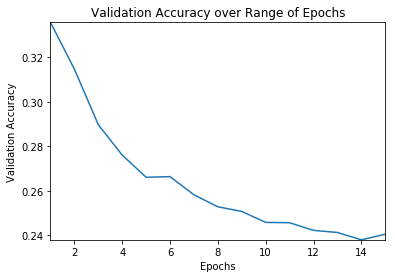

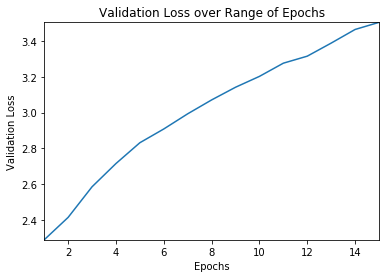

In [9]:
#Extract Accuracy and Loss from keras callback history
metrics = basic_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Recurrent Neural Network (RNN) with a layer_simple_rnn

In [10]:
# Define the model
rnn_simple = Sequential()
rnn_simple.add(Embedding(vocab_size, em_space, input_length=pad_length))
rnn_simple.add(SimpleRNN(em_space))
rnn_simple.add(Dense(24, activation='softmax'))

# Compile the model
rnn_simple.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#Fit and Store Model Val
rnn_metrics = rnn_simple.fit(train_x, train_y, epochs= 15, batch_size= 1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 30s 107us/step - loss: 2.4722 - acc: 0.2789 - val_loss: 3.0035 - val_acc: 0.1560
Epoch 2/15
278612/278612 [==============================] - 31s 110us/step - loss: 1.6559 - acc: 0.5326 - val_loss: 3.0928 - val_acc: 0.1973
Epoch 3/15
278612/278612 [==============================] - 31s 110us/step - loss: 1.3322 - acc: 0.6313 - val_loss: 3.5223 - val_acc: 0.1770
Epoch 4/15
278612/278612 [==============================] - 30s 107us/step - loss: 1.1801 - acc: 0.6862 - val_loss: 3.7311 - val_acc: 0.1759
Epoch 5/15
278612/278612 [==============================] - 30s 108us/step - loss: 1.0668 - acc: 0.7210 - val_loss: 3.6729 - val_acc: 0.1819
Epoch 6/15
278612/278612 [==============================] - 31s 111us/step - loss: 0.9770 - acc: 0.7471 - val_loss: 3.7246 - val_acc: 0.1922
Epoch 7/15
278612/278612 [==============================] - 31s 110us/step - loss: 0.9902 - acc: 0.7415

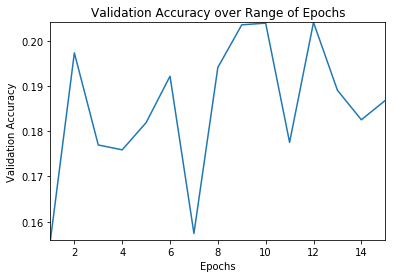

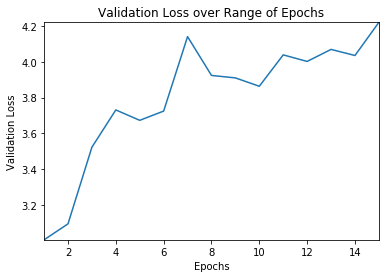

In [11]:
#Extract Accuracy and Loss from keras callback history
metrics = rnn_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Estimate RNN with an LSTM Layer

In [12]:
# Define the model
rnn_lstm = Sequential()
rnn_lstm.add(Embedding(vocab_size, em_space, input_length=pad_length))
rnn_lstm.add(LSTM(em_space))
rnn_lstm.add(Dense(24, activation='softmax'))

# Compile the model
rnn_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Fit and Store Model Val
rnn_lstm_metrics = rnn_lstm.fit(train_x, train_y,  epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 96s 345us/step - loss: 2.4438 - acc: 0.2842 - val_loss: 2.7316 - val_acc: 0.2274
Epoch 2/15
278612/278612 [==============================] - 96s 343us/step - loss: 1.5238 - acc: 0.5948 - val_loss: 3.1779 - val_acc: 0.2380
Epoch 3/15
278612/278612 [==============================] - 96s 343us/step - loss: 1.1048 - acc: 0.7193 - val_loss: 3.3783 - val_acc: 0.2227
Epoch 4/15
278612/278612 [==============================] - 96s 346us/step - loss: 0.8791 - acc: 0.7820 - val_loss: 3.5730 - val_acc: 0.2292
Epoch 5/15
278612/278612 [==============================] - 95s 339us/step - loss: 0.7483 - acc: 0.8119 - val_loss: 3.5962 - val_acc: 0.2198
Epoch 6/15
278612/278612 [==============================] - 95s 342us/step - loss: 0.6718 - acc: 0.8286 - val_loss: 3.6451 - val_acc: 0.2349
Epoch 7/15
278612/278612 [==============================] - 95s 342us/step - loss: 0.6189 - acc: 0.8400

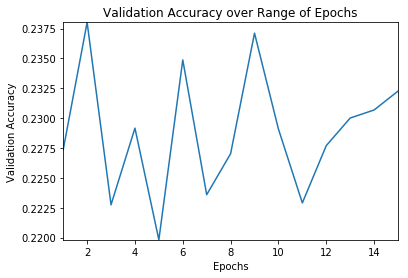

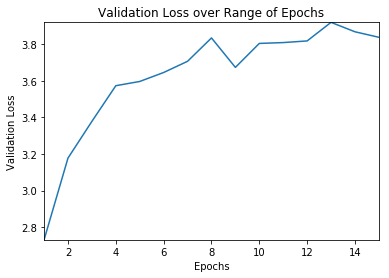

In [13]:
#Extract Accuracy and Loss from keras callback history
metrics = rnn_lstm_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Estimate RNN with GRU Layer

In [14]:
# Define the model
rnn_gru = Sequential()
rnn_gru.add(Embedding(vocab_size, em_space, input_length=pad_length))
rnn_gru.add(GRU(em_space))
rnn_gru.add(Dense(24, activation='softmax'))

# Compile the model
rnn_gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Fit and Store Model Val
rnn_gru_metrics = rnn_gru.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 81s 290us/step - loss: 2.5885 - acc: 0.2067 - val_loss: 2.9574 - val_acc: 0.1489
Epoch 2/15
278612/278612 [==============================] - 79s 283us/step - loss: 1.8786 - acc: 0.4616 - val_loss: 3.2888 - val_acc: 0.1804
Epoch 3/15
278612/278612 [==============================] - 79s 284us/step - loss: 1.3474 - acc: 0.6346 - val_loss: 3.6465 - val_acc: 0.2031
Epoch 4/15
278612/278612 [==============================] - 80s 289us/step - loss: 1.0276 - acc: 0.7365 - val_loss: 3.7407 - val_acc: 0.2052
Epoch 5/15
278612/278612 [==============================] - 80s 287us/step - loss: 0.8455 - acc: 0.7870 - val_loss: 3.7173 - val_acc: 0.2113
Epoch 6/15
278612/278612 [==============================] - 79s 284us/step - loss: 0.7359 - acc: 0.8138 - val_loss: 3.9351 - val_acc: 0.2090
Epoch 7/15
278612/278612 [==============================] - 80s 289us/step - loss: 0.6662 - acc: 0.8289

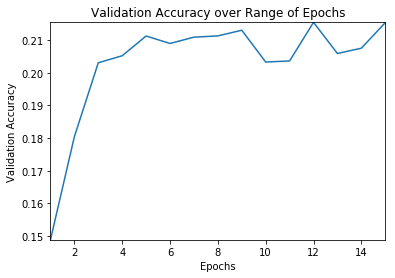

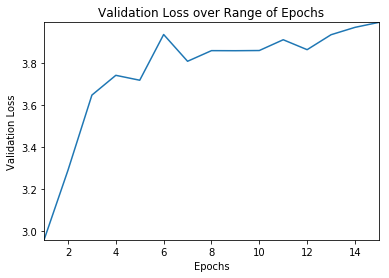

In [15]:
#Extract Accuracy and Loss from keras callback history
metrics = rnn_gru_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### 5 Models to Tune

##### Model 1 - Add Dropout to LSTM Model

In [16]:
model_dropout = Sequential()
model_dropout.add(Embedding(vocab_size, em_space, input_length=pad_length))
model_dropout.add(LSTM(em_space,dropout=0.1,recurrent_dropout=0.5))
model_dropout.add(Dense(24, activation='softmax'))

model_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model_dropout_metrics = model_dropout.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 112s 403us/step - loss: 2.6557 - acc: 0.2114 - val_loss: 2.6810 - val_acc: 0.2279
Epoch 2/15
278612/278612 [==============================] - 110s 395us/step - loss: 1.6201 - acc: 0.5416 - val_loss: 2.9647 - val_acc: 0.2764
Epoch 3/15
278612/278612 [==============================] - 111s 398us/step - loss: 0.9713 - acc: 0.7483 - val_loss: 3.2332 - val_acc: 0.2577
Epoch 4/15
278612/278612 [==============================] - 111s 397us/step - loss: 0.7543 - acc: 0.8036 - val_loss: 3.4354 - val_acc: 0.2592
Epoch 5/15
278612/278612 [==============================] - 110s 394us/step - loss: 0.6627 - acc: 0.8244 - val_loss: 3.4437 - val_acc: 0.2500
Epoch 6/15
278612/278612 [==============================] - 108s 388us/step - loss: 0.6080 - acc: 0.8362 - val_loss: 3.4573 

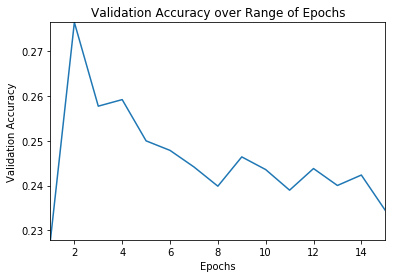

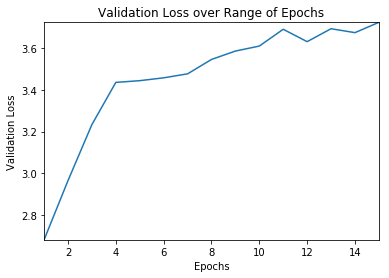

In [17]:
#Extract Accuracy and Loss from keras callback history
metrics = model_dropout_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 2 - Add Additional Layers to LSTM with dropout 

In [19]:
model2_dropout = Sequential()
model2_dropout.add(Embedding(vocab_size, em_space, input_length=pad_length))
model2_dropout.add(LSTM(em_space,dropout=0.1,recurrent_dropout=0.5, return_sequences=True))
model2_dropout.add(LSTM(em_space,dropout=0.1,recurrent_dropout=0.5, return_sequences=True))
model2_dropout.add(LSTM(em_space))
model2_dropout.add(Dense(24, activation='softmax'))

model2_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model2_dropout_metrics = model2_dropout.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 311s 1ms/step - loss: 2.5989 - acc: 0.1912 - val_loss: 2.9535 - val_acc: 0.1453
Epoch 2/15
278612/278612 [==============================] - 308s 1ms/step - loss: 2.0807 - acc: 0.3498 - val_loss: 3.0502 - val_acc: 0.1698
Epoch 3/15
278612/278612 [==============================] - 308s 1ms/step - loss: 1.6010 - acc: 0.5317 - val_loss: 3.2011 - val_acc: 0.2104
Epoch 4/15
278612/278612 [==============================] - 305s 1ms/step - loss: 1.2647 - acc: 0.6555 - val_loss: 3.3733 - val_acc: 0.2179
Epoch 5/15
278612/278612 [==============================] - 307s 1ms/step - loss: 1.0636 - acc: 0.7243 - val_loss: 3.3874 - val_acc: 0.2234
Epoch 6/15
278612/278612 [==============================] - 307s 1ms/step - loss: 0.9369 - acc: 0.7579 - val_loss: 3.4393 - val_acc: 0.2197
Epoch 7/15
278612/278612 [==============================] - 306s 1ms/step - loss: 0.8479 - acc: 0.7800 - val_

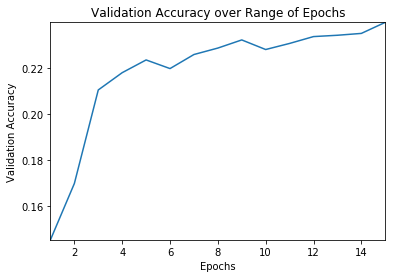

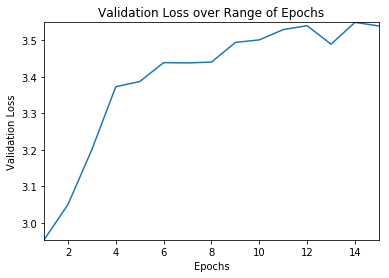

In [20]:
#Extract Accuracy and Loss from keras callback history
metrics = model2_dropout_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 3 - Add Multiple Additional Layers for GRU with Dropout

In [20]:
model3 = Sequential()
model3.add(Embedding(vocab_size, em_space, input_length=pad_length))
model3.add(GRU(em_space, dropout=0.1, recurrent_dropout=0.3, return_sequences=True))
model3.add(GRU(em_space, dropout=0.1, recurrent_dropout=0.3, return_sequences=True))
model3.add(GRU(em_space))
model3.add(Dense(24, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model3_metrics = model3.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 252s 904us/step - loss: 2.3172 - acc: 0.2749 - val_loss: 3.2610 - val_acc: 0.1667
Epoch 2/15
278612/278612 [==============================] - 250s 899us/step - loss: 1.6719 - acc: 0.5024 - val_loss: 3.4800 - val_acc: 0.1867
Epoch 3/15
278612/278612 [==============================] - 248s 889us/step - loss: 1.3288 - acc: 0.6372 - val_loss: 3.5387 - val_acc: 0.2046
Epoch 4/15
278612/278612 [==============================] - 250s 899us/step - loss: 1.0610 - acc: 0.7239 - val_loss: 3.4769 - val_acc: 0.2118
Epoch 5/15
278612/278612 [==============================] - 249s 892us/step - loss: 0.9027 - acc: 0.7663 - val_loss: 3.4736 - val_acc: 0.2200
Epoch 6/15
278612/278612 [==============================] - 249s 893us/step - loss: 0.7882 - acc: 0.7935 - val_loss: 3.4481 - val_acc: 0.2190
Epoch 7/15
278612/278612 [==============================] - 249s 895us/step - loss: 0.7153 - acc:

In [ ]:
#Extract Accuracy and Loss from keras callback history
metrics = model3_rnn_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 4  - GRU with Dropout

In [14]:
model4_dropout = Sequential()
model4_dropout.add(Embedding(vocab_size, 32, input_length=pad_length))
model4_dropout.add(GRU(32,dropout=0.1,recurrent_dropout=0.5))
model4_dropout.add(Dense(24, activation='softmax'))

model4_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model4_dropout_metrics = model4_dropout.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 92s 329us/step - loss: 2.6328 - acc: 0.2132 - val_loss: 2.7747 - val_acc: 0.1897
Epoch 2/15
278612/278612 [==============================] - 90s 323us/step - loss: 1.7815 - acc: 0.4968 - val_loss: 2.9360 - val_acc: 0.2503
Epoch 3/15
278612/278612 [==============================] - 89s 320us/step - loss: 1.2061 - acc: 0.6829 - val_loss: 3.1982 - val_acc: 0.2507
Epoch 4/15
278612/278612 [==============================] - 89s 321us/step - loss: 0.9026 - acc: 0.7683 - val_loss: 3.3843 - val_acc: 0.2358
Epoch 5/15
278612/278612 [==============================] - 90s 324us/step - loss: 0.7498 - acc: 0.8012 - val_loss: 3.4893 - val_acc: 0.2277
Epoch 6/1

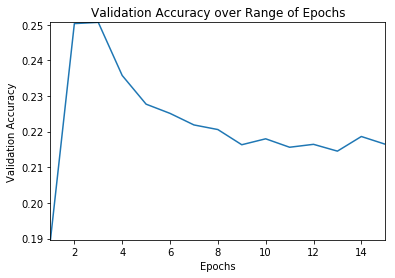

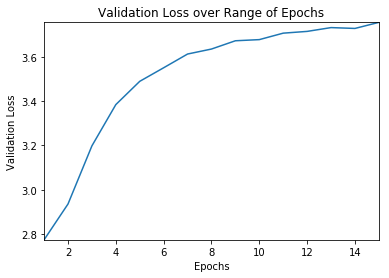

In [15]:
#Extract Accuracy and Loss from keras callback history
metrics = model4_dropout_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 5 - Increase Number of Epochs (double it)

In [16]:
# Define the model
model5 = Sequential()
model5.add(Embedding(10000, em_space, input_length = 100))
model5.add(Flatten())
model5.add(Dense(24, activation='softmax'))

# Compile the model
model5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#Fit and Store Model Val
model5_metrics = model5.fit(train_x, train_y, epochs= 50, batch_size=1024,validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 8s 30us/step - loss: 2.1344 - acc: 0.4117 - val_loss: 2.2946 - val_acc: 0.3378
Epoch 2/50
278612/278612 [==============================] - 8s 29us/step - loss: 1.0138 - acc: 0.7417 - val_loss: 2.3988 - val_acc: 0.3175
Epoch 3/50
278612/278612 [==============================] - 8s 29us/step - loss: 0.7159 - acc: 0.8088 - val_loss: 2.5782 - val_acc: 0.2964
Epoch 4/50
278612/278612 [==============================] - 8s 29us/step - loss: 0.6159 - acc: 0.8316 - val_loss: 2.7289 - val_acc: 0.2787
Epoch 5/50
278612/278612 [==============================] - 8s 28us/step - loss: 0.5608 - acc: 0.8456 - val_loss: 2.8258 - val_acc: 0.2714
Epoch 6/50
278612/278612 [==============================] - 8s 29us/step - loss: 0.5225 - acc: 0.8551 - val_loss: 2.9125 - val_acc: 0.2649
Epoch 7/50
278612/278612 [==============================] - 8s 29us/step - loss: 0.4934 - acc: 0.8628 - val_loss: 2

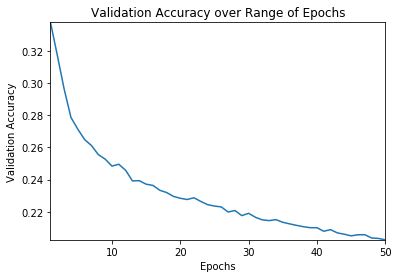

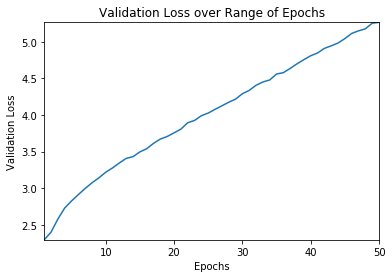

In [17]:
#Extract Accuracy and Loss from keras callback history
metrics = model5_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Final Model

#### Select Best Model

In [4]:
#Find Best Estimate of Each Model

def best_estimate(metric_list):
    min_val = min(metric_list)
    best_iter = metric_list.index(min_val)
    return (min_val, best_iter + 1)

In [ ]:
#Model Loss
md1 = basic_metrics.history
md2 = rnn_metrics.history
md3 = rnn_lstm_metrics.history
md4 = rnn_gru_metrics.history
md5 = model_dropout.history
md6 = model2_dropout.history
md7 = model3_rnn.history
md8 = model4_dropout.history
md9 = model5.history

md1_loss = md1['val_loss']
md2_loss = md2['val_loss']
md3_loss = md3['val_loss']
md4_loss = md4['val_loss']
md5_loss = md5['val_loss']
md6_loss = md6['val_loss']
md7_loss = md7['val_loss']
md8_loss = md8['val_loss']
md9_loss = md9['val_loss']

In [ ]:
(md1_min, md1_best) = best_estimate(md1_loss)
(md2_min, md2_best) = best_estimate(md2_loss)
(md3_min, md3_best) = best_estimate(md3_loss)
(md4_min, md4_best) = best_estimate(md4_loss)
(md5_min, md5_best) = best_estimate(md5_loss)
(md6_min, md6_best) = best_estimate(md6_loss)
(md7_min, md7_best) = best_estimate(md7_loss)
(md8_min, md8_best) = best_estimate(md8_loss)
(md9_min, md9_best) = best_estimate(md9_loss)

print(md1_min, md2_min, md3_min, md4_min, md5_min, md6_min, md7_min, md8_min, md9_min)

The final model used for the evaluation is the multilayer GRU RNN with dropput. Model 4 has similar parameters but has only one layer and is also evaluated

In [22]:
model3.evaluate(test_x, test_y)

38693/38693 [==============================] - 35s 898us/step


[3.874278303035992, 0.19473806631729]

In [23]:
model4_dropout.evaluate(test_x, test_y)

38693/38693 [==============================] - 13s 325us/step


[3.9482556580110786, 0.18706225932377693]

Comment: As seen in the result, even using a more complex model with recurrent neural network does not achieve the high standard of accuracy that a 95% human baseline provides. 